In [779]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

pd.options.display.float_format = '{:f}'.format
sns.set(font_scale=1, style='whitegrid')

In [780]:
full_df = pd.read_csv('telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


In [781]:
df = full_df.dropna()
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
9,31.662500,25.500000,29.990000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,...,1.000000,N,U,U,U,U,U,Y,601.000000,1000010
14,212.515000,1971.500000,84.990000,2.227500,249.500000,99.800000,99.800000,0.000000,35.497500,-200.500000,...,0.000000,N,U,U,Y,U,U,Y,199.000000,1000015
16,63.017500,440.250000,59.980000,0.000000,5.750000,1.725000,1.725000,0.000000,1.312500,-16.250000,...,0.000000,N,U,U,U,U,U,Y,530.000000,1000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,49.362500,187.750000,40.072500,2.970000,18.000000,6.320000,6.125000,0.195000,0.000000,-187.750000,...,0.000000,S,U,U,U,U,U,Y,153.000000,1099940
99940,47.490000,0.000000,49.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,N,U,U,U,U,Y,Y,829.000000,1099941
99963,41.840000,351.000000,30.000000,0.990000,31.000000,10.850000,10.850000,0.000000,0.000000,0.000000,...,0.000000,H,U,U,Y,U,U,Y,254.000000,1099964
99970,38.340000,319.500000,30.000000,0.990000,21.000000,7.350000,7.350000,0.000000,0.000000,-66.500000,...,0.000000,H,U,U,U,U,U,Y,945.000000,1099971


In [782]:
cat_columns = []
for c in df.columns:
    if df[c].dtype.name == 'object':
        cat_columns.append(c)
        df[c] = df[c].astype('category')
print(cat_columns)
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


/var/folders/4s/hl9y6lqs3h1c9qxxnbjmtvsr0000gn/T/ipykernel_21182/4259628228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype('category')
/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,8,0,0,0,0,0,1,361.000000,1000001
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,5,0,0,0,0,0,1,434.000000,1000005
9,31.662500,25.500000,29.990000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,...,1.000000,8,0,0,0,0,0,1,601.000000,1000010
14,212.515000,1971.500000,84.990000,2.227500,249.500000,99.800000,99.800000,0.000000,35.497500,-200.500000,...,0.000000,8,0,0,1,0,0,1,199.000000,1000015
16,63.017500,440.250000,59.980000,0.000000,5.750000,1.725000,1.725000,0.000000,1.312500,-16.250000,...,0.000000,8,0,0,0,0,0,1,530.000000,1000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,49.362500,187.750000,40.072500,2.970000,18.000000,6.320000,6.125000,0.195000,0.000000,-187.750000,...,0.000000,12,0,0,0,0,0,1,153.000000,1099940
99940,47.490000,0.000000,49.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8,0,0,0,0,1,1,829.000000,1099941
99963,41.840000,351.000000,30.000000,0.990000,31.000000,10.850000,10.850000,0.000000,0.000000,0.000000,...,0.000000,4,0,0,1,0,0,1,254.000000,1099964
99970,38.340000,319.500000,30.000000,0.990000,21.000000,7.350000,7.350000,0.000000,0.000000,-66.500000,...,0.000000,4,0,0,0,0,0,1,945.000000,1099971


<AxesSubplot:>

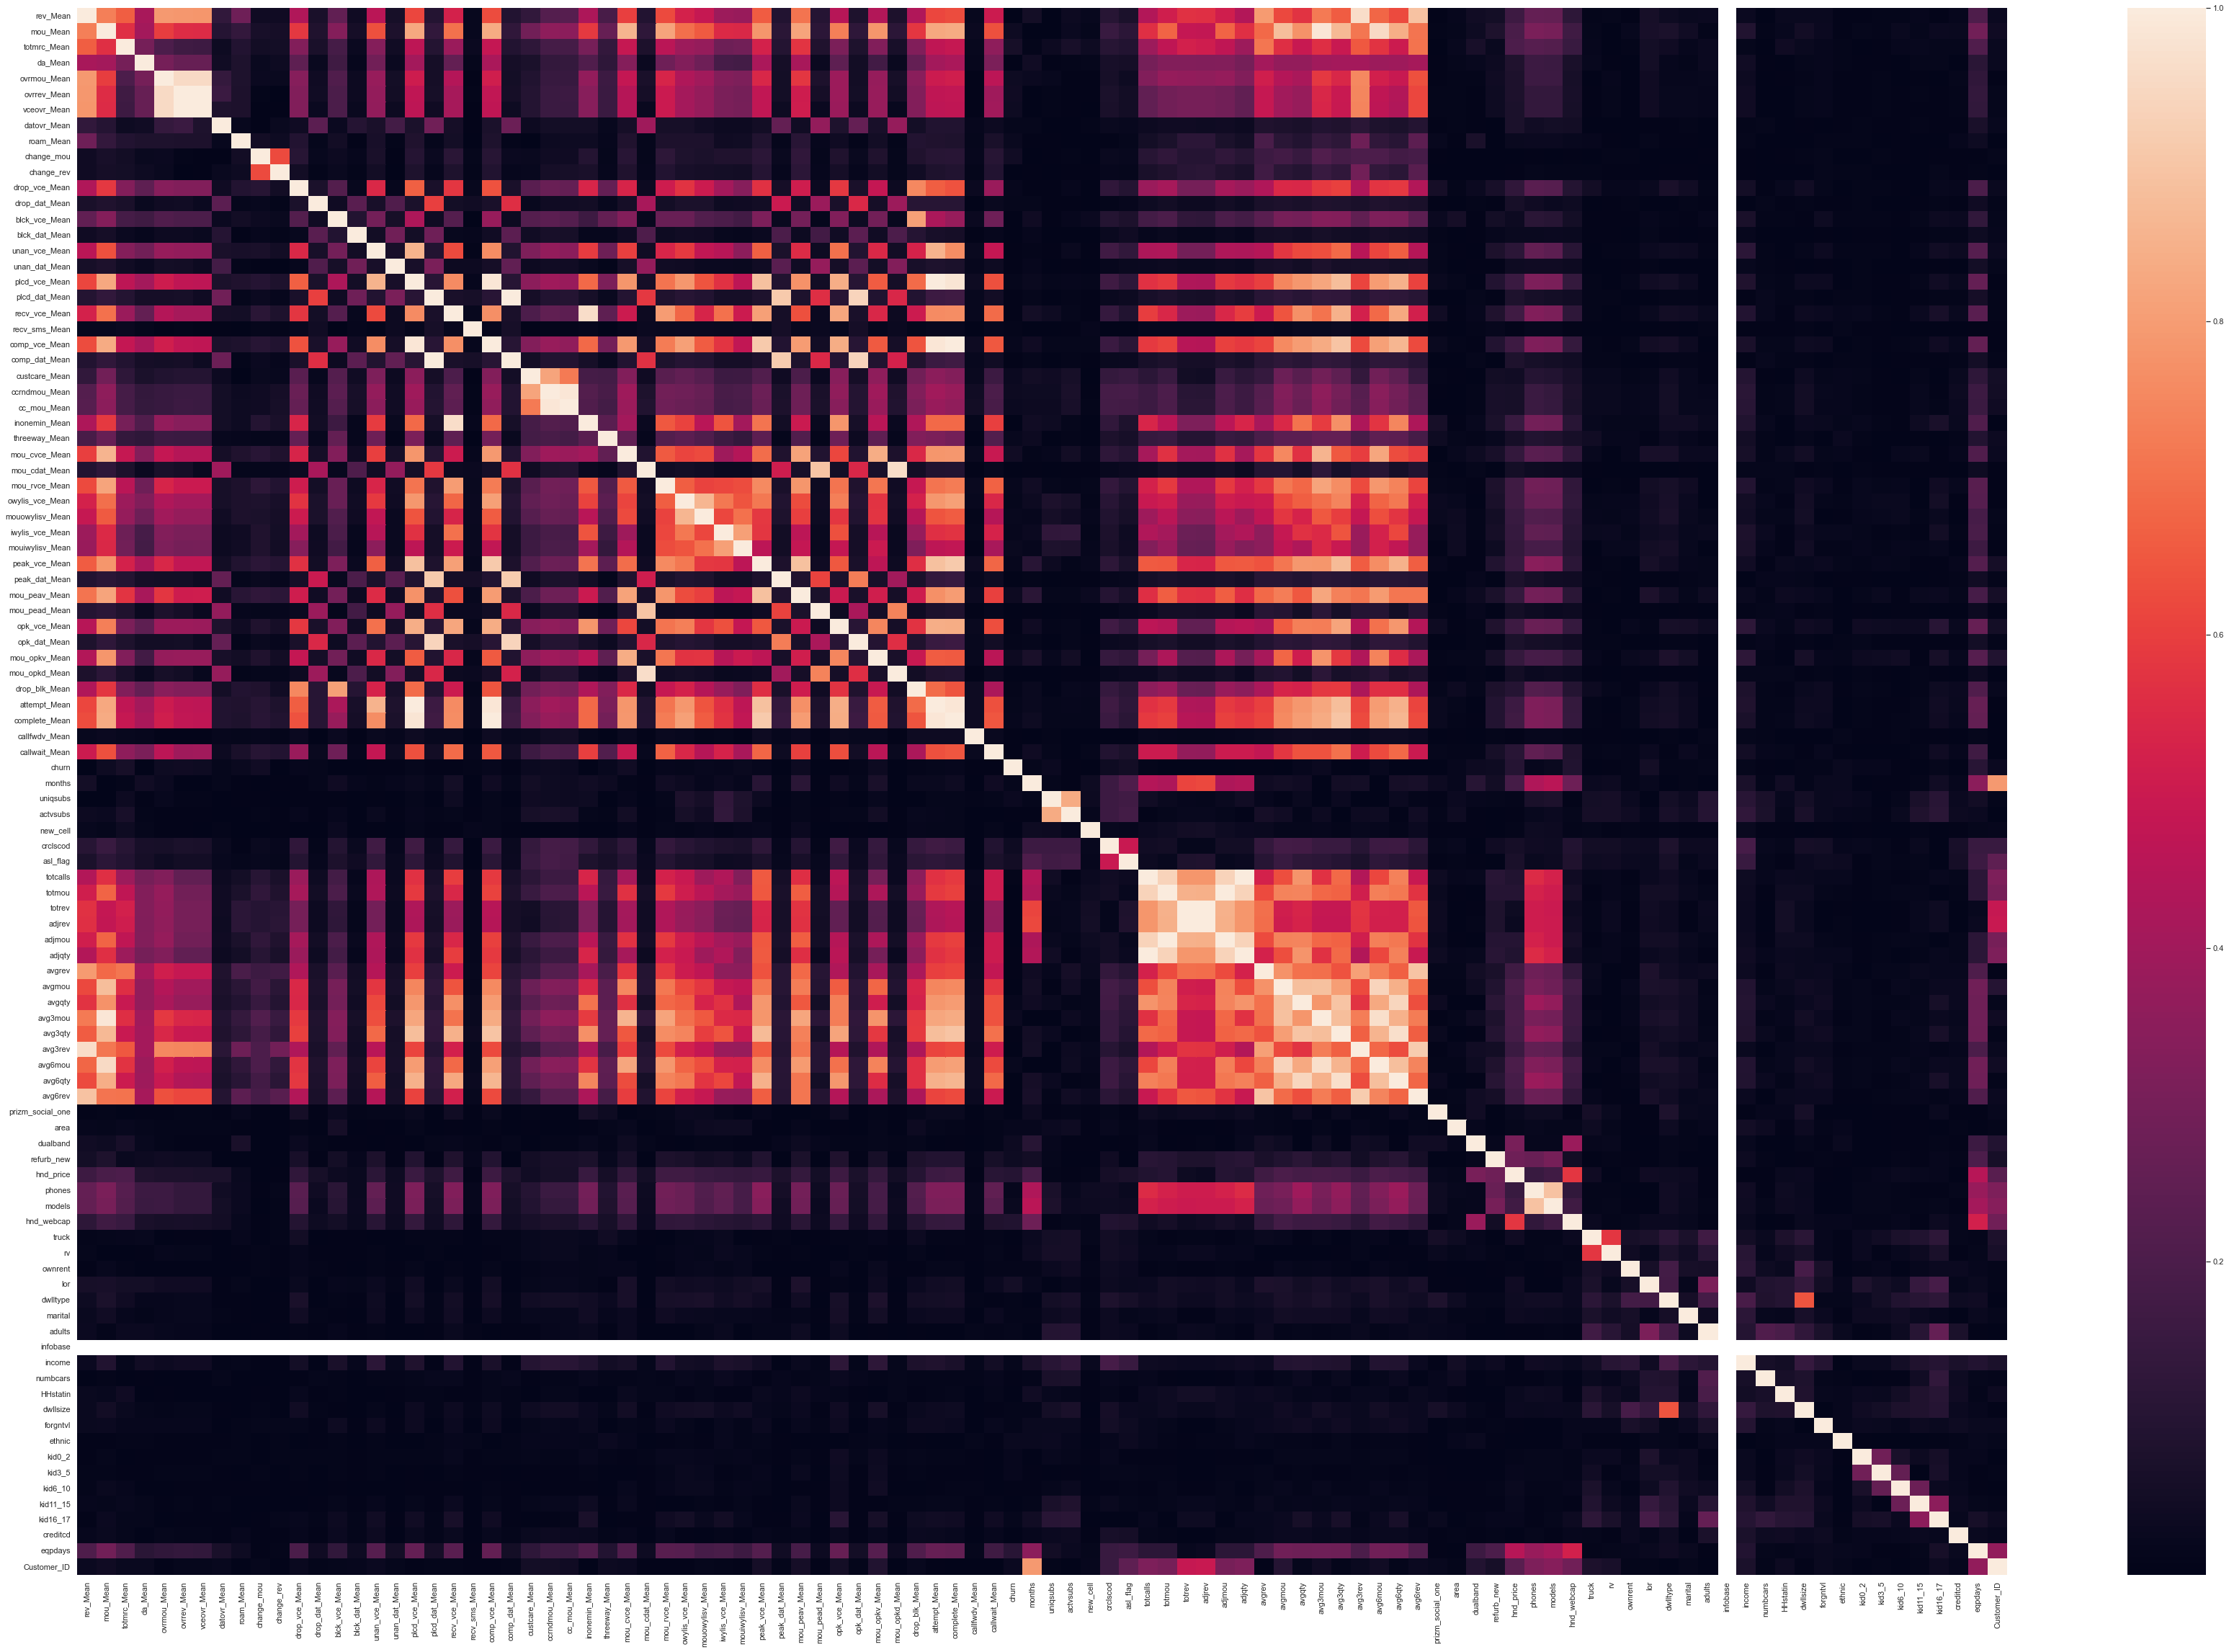

In [783]:
plt.figure(figsize = (60,40))
sns.heatmap(np.abs(df.corr()))

In [784]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

## Choose RV for analysis

In [785]:
target_features = ['rev_Mean', 'totmrc_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'totrev', 'adjrev', 'avgrev', 'avg3rev', 'avg6rev', 'change_rev']


<AxesSubplot:>

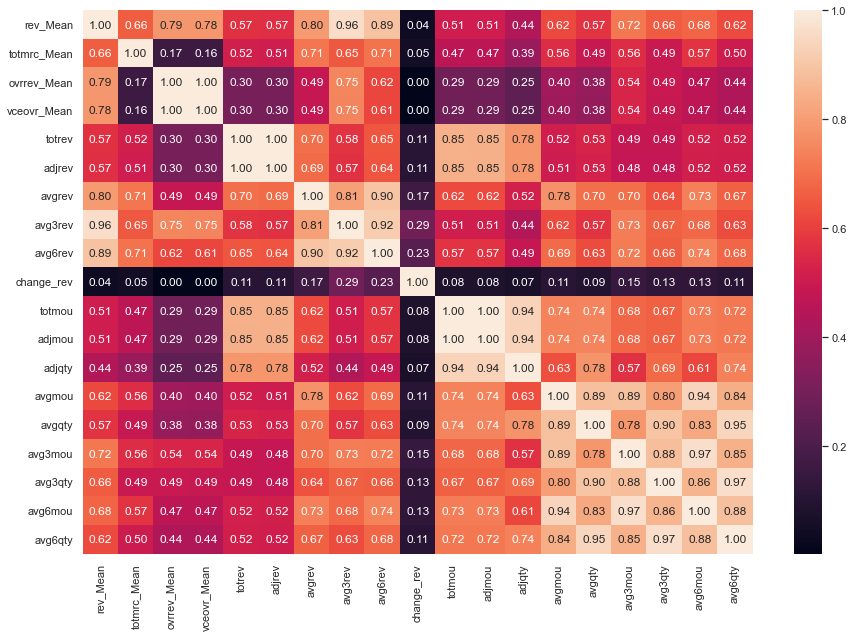

In [786]:
call_avg_features = ['totmou', 'adjmou', 'adjqty', 'avgmou','avgqty', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + call_avg_features].corr()), annot=True, fmt='.2f')

<AxesSubplot:>

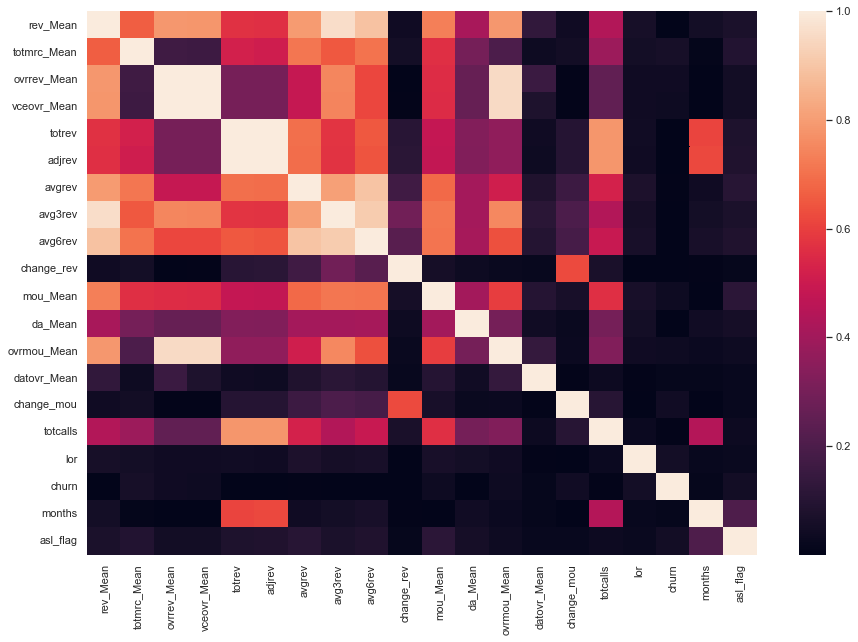

In [787]:
call_ovr_features = ['mou_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                     'change_mou', 'totcalls', 'lor', 'churn', 'months', 'asl_flag']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + call_ovr_features].corr()))

<AxesSubplot:>

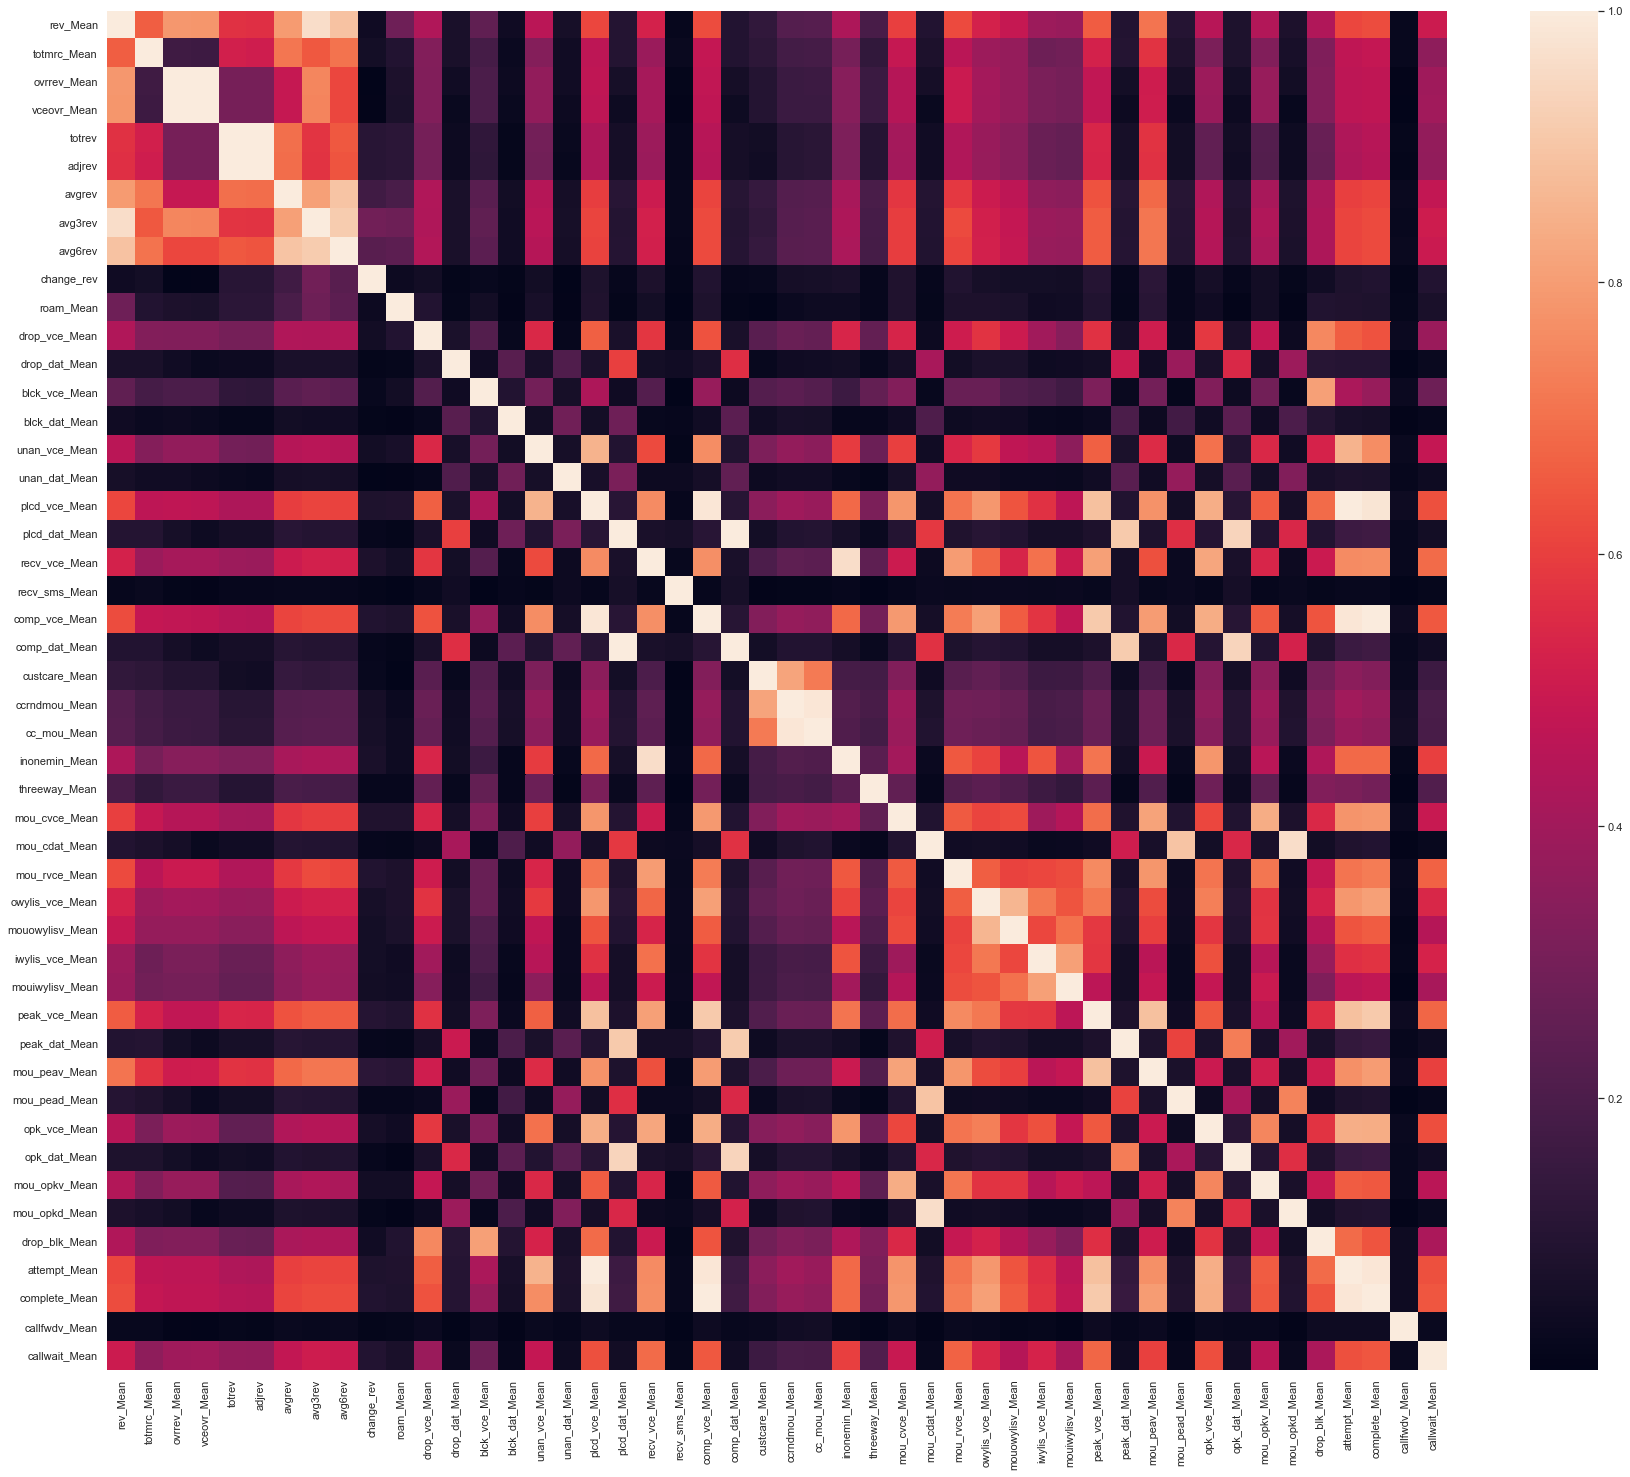

In [788]:
call_mean_features = ['roam_Mean', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean']

plt.figure(figsize = (30,25))
sns.heatmap(np.abs(df[target_features + call_mean_features].corr()))

<AxesSubplot:>

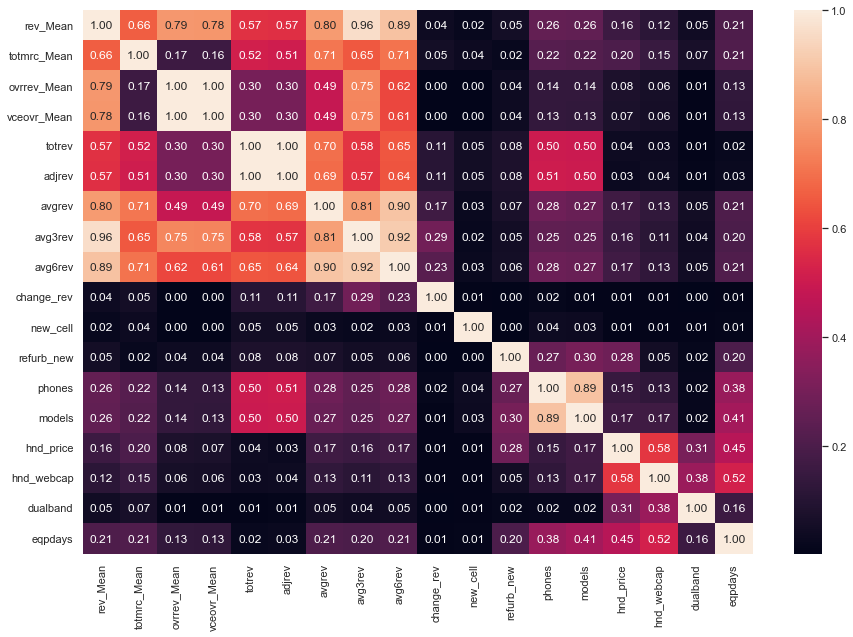

In [789]:
handset_features = ['new_cell', 'refurb_new', 'phones', 'models', 'hnd_price', 'hnd_webcap', 'dualband', 'eqpdays']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + handset_features].corr()), annot=True, fmt='.2f')

<AxesSubplot:>

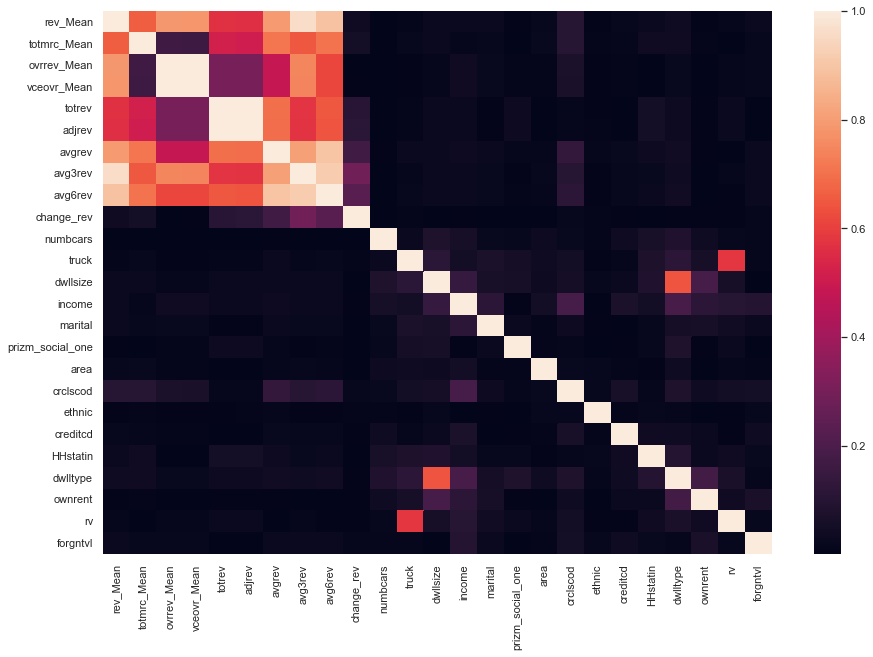

In [790]:
material_status = ['numbcars', 'truck', 'dwllsize',
                   'income', 'marital', 'prizm_social_one', 'area', 'crclscod', 'ethnic', 'creditcd', 'HHstatin',
                   'dwlltype', 'ownrent', 'rv', 'forgntvl']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + material_status].corr()))

<AxesSubplot:>

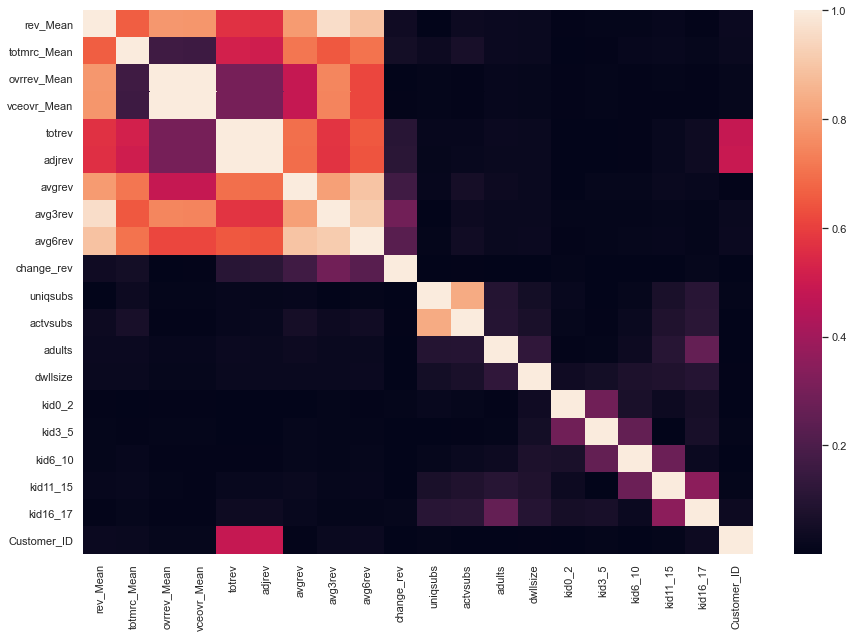

In [791]:
human_features = ['uniqsubs', 'actvsubs', 'adults', 'dwllsize', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'Customer_ID']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + human_features].corr()))

<AxesSubplot:>

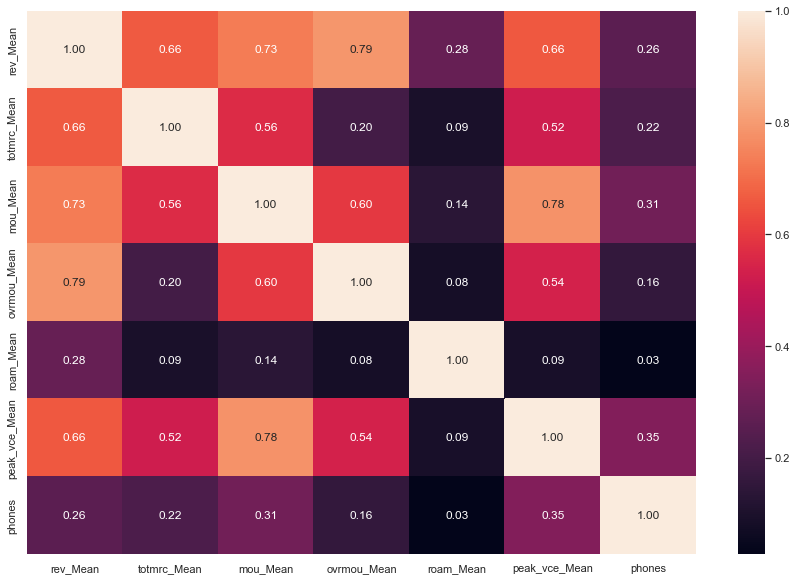

In [792]:
target_feature = 'rev_Mean'
target_features = [target_feature]

predict_features_all = ['totmrc_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean', 'mou_cvce_Mean',
                    'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'peak_vce_Mean',
                    'mou_peav_Mean', 'attempt_Mean','complete_Mean', 
                    'phones', 'models', 'datovr_Mean', 'months',
                    'mou_Mean', 'ovrmou_Mean', 'totcalls']

plt.figure(figsize = (15,10))
predict_features = ['totmrc_Mean', 'mou_Mean', 'ovrmou_Mean', 'roam_Mean', 'peak_vce_Mean', 'phones']
sns.heatmap(df[[target_feature] + predict_features].corr(), annot=True, fmt='.2f')

In [793]:
df_filtered = df[[target_feature] + predict_features].dropna()
df_filtered.describe()

,rev_Mean,totmrc_Mean,mou_Mean,ovrmou_Mean,roam_Mean,peak_vce_Mean,phones
count,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000
mean,55.376047,45.003869,450.066734,36.023390,1.188133,82.614205,1.815503
std,41.238244,23.808488,471.538127,88.421331,7.017669,99.450349,1.315324
min,0.582500,-1.422500,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31.882500,30.000000,134.250000,0.000000,0.000000,19.666667,1.000000
50%,44.335000,42.490000,305.500000,1.000000,0.000000,54.666667,1.000000
75%,65.697500,58.000000,601.500000,33.500000,0.292500,110.333333,2.000000
max,672.015000,349.572500,6103.750000,2018.000000,476.812500,1784.666667,19.000000


## Step 1. Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV .

/var/folders/4s/hl9y6lqs3h1c9qxxnbjmtvsr0000gn/T/ipykernel_21182/1985404959.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(h, 3, index)


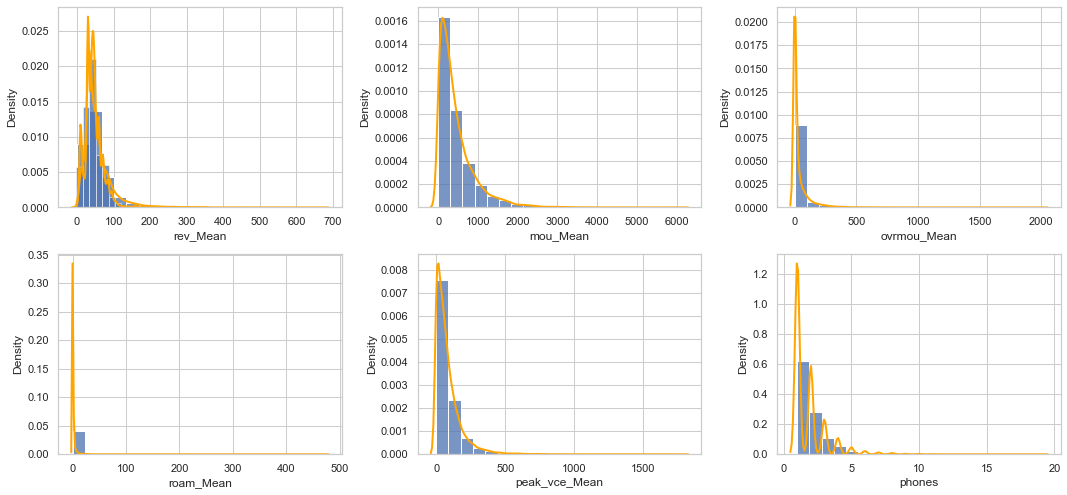

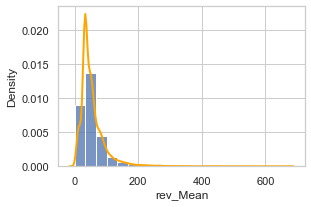

In [817]:
from scipy.stats import gaussian_kde, trimboth

n = len(predict_features)
h = int(np.ceil((n + 1) / 3))

def plot(feature, index, bins=20):
    ax = plt.subplot(h, 3, index)
    data = df[feature].dropna()

    sns.set(font_scale=1, style='whitegrid')
    
    sns.histplot(data, ax=ax, bins=bins, stat='density')
    sns.kdeplot(data, ax=ax, color='orange', linewidth=2)

plt.figure(figsize = (15,10))

plot(target_feature, index=1)

for i, predict_feature in enumerate(predict_features):
    plot(predict_feature, 1 + i)
    
plt.tight_layout()
plt.show()


plt.figure(figsize = (15,10))
plot(target_feature, index=1)
plt.show()

## Step 2. Estimation of multivariate mathematical expectation and variance.

In [795]:
for target_feature in target_features:
    print(f'{target_feature} mean={df[target_feature].mean()}')
    print(f'{target_feature} var={df[target_feature].var()}')

rev_Mean mean=55.37604693253675
rev_Mean var=1700.5927825209994


## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

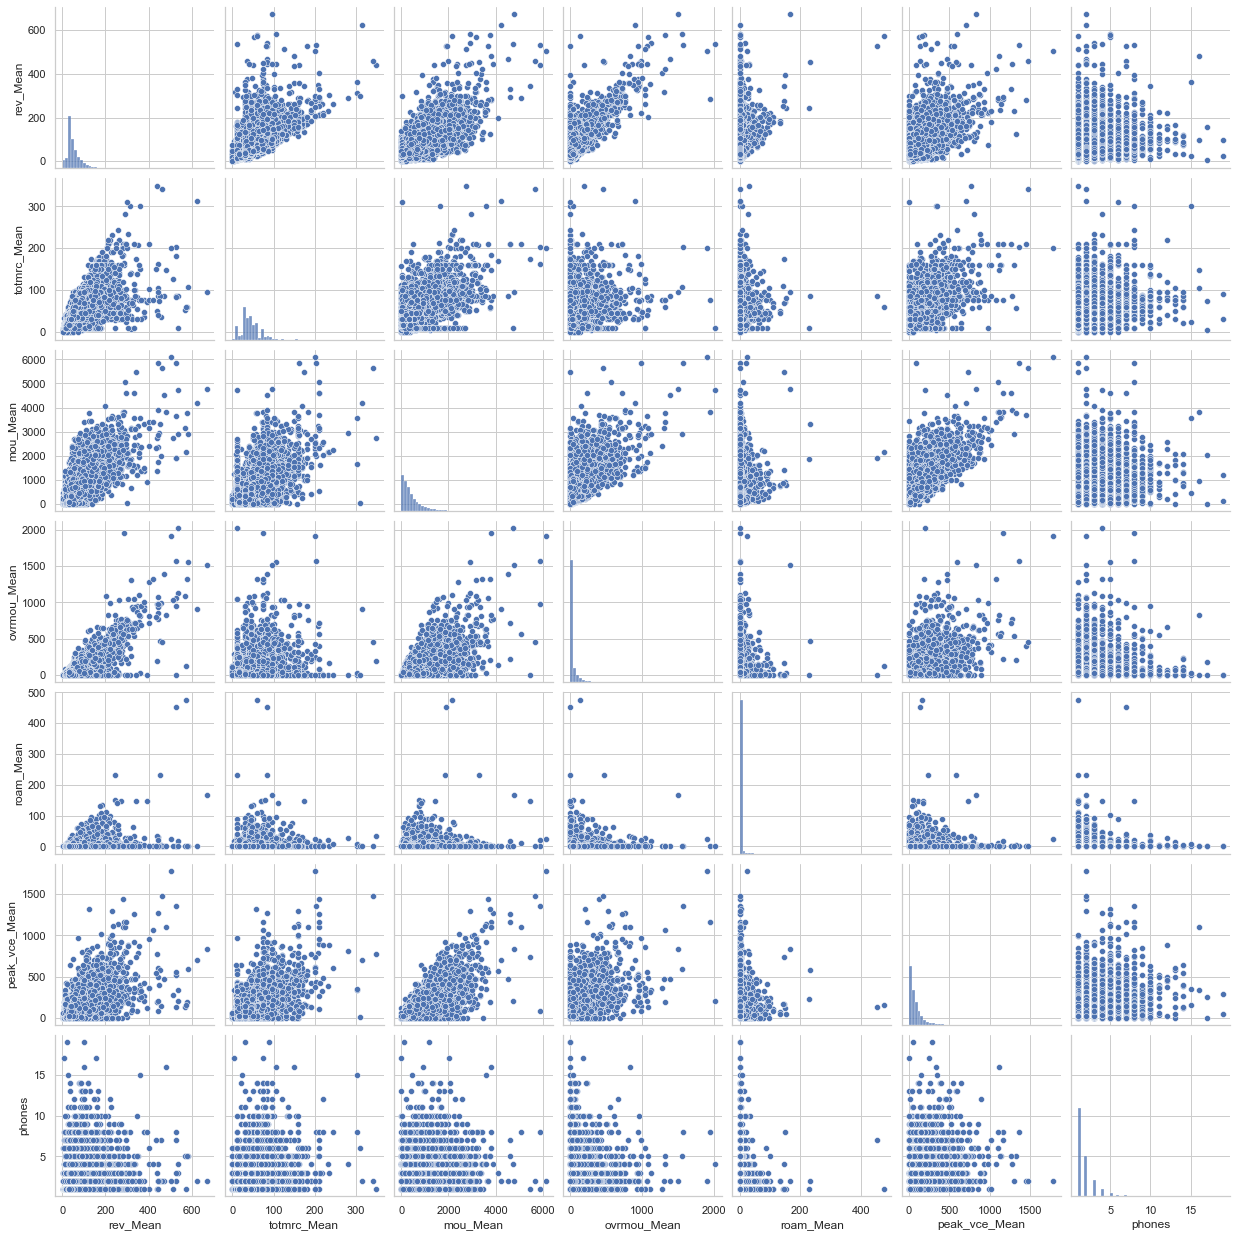

In [796]:
sns.set(font_scale=1, style='whitegrid')
sns.pairplot(df_filtered, diag_kws = {"bins": 50})
plt.show()

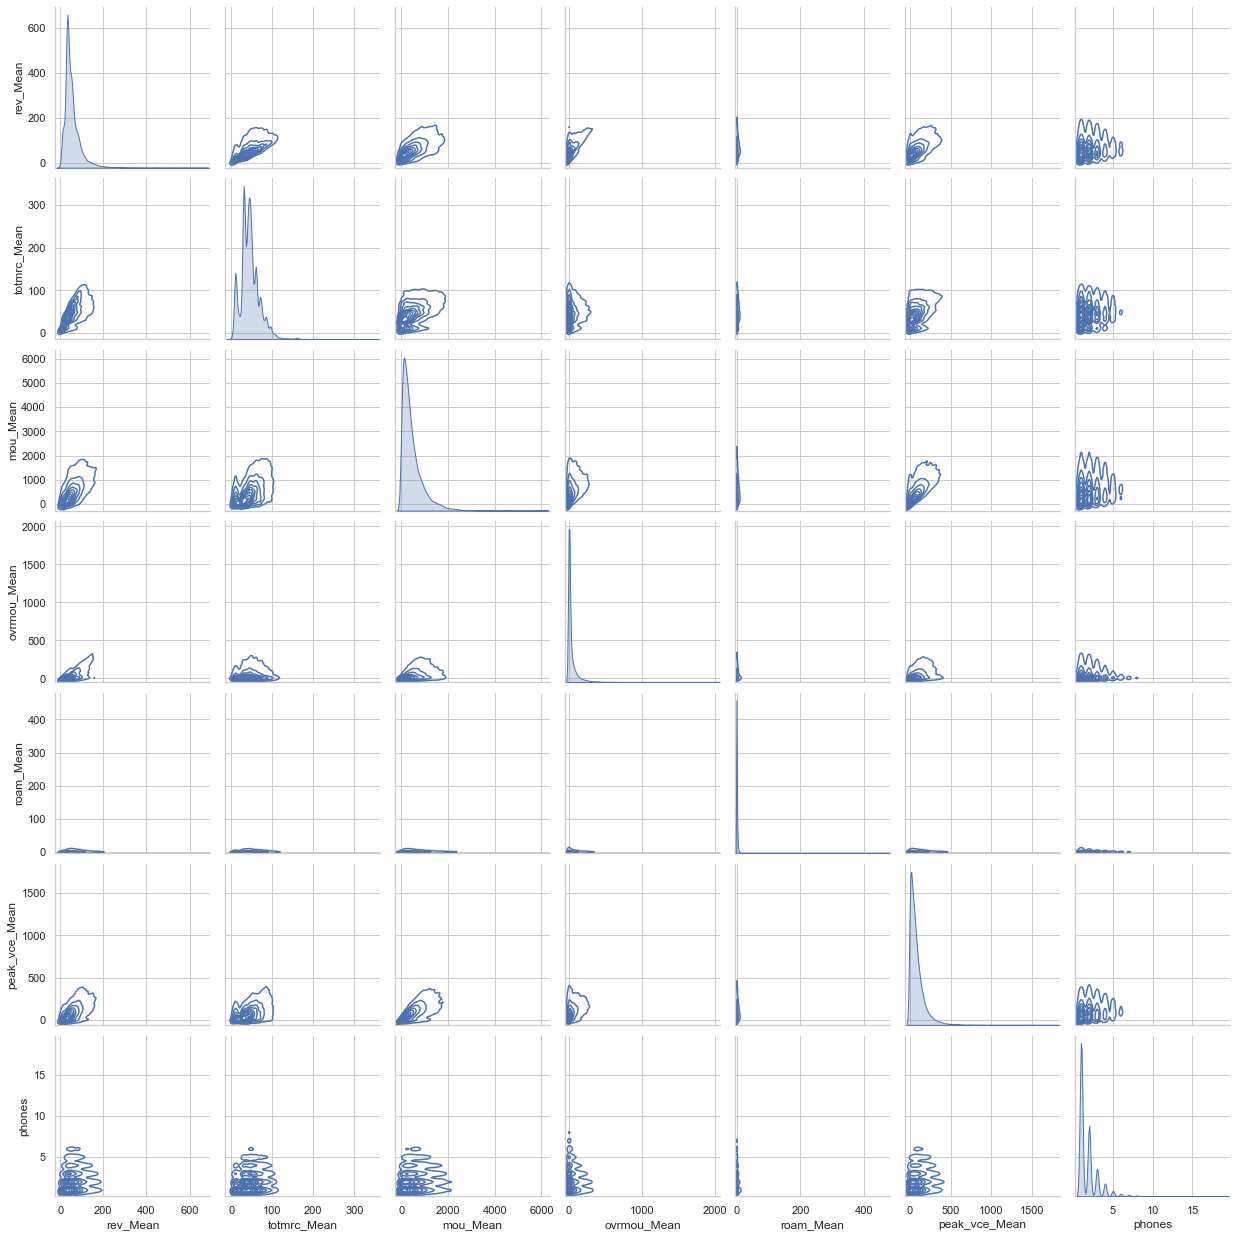

In [797]:
sns.set(font_scale=1, style='whitegrid')
sns.pairplot(df_filtered, kind="kde")
plt.show()

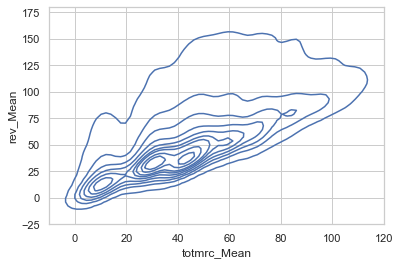

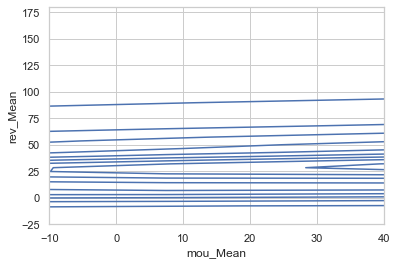

In [819]:
sns.kdeplot(data=df_filtered, x='totmrc_Mean', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-10, 120])
ax.set_ylim([-25, 180])
plt.show()

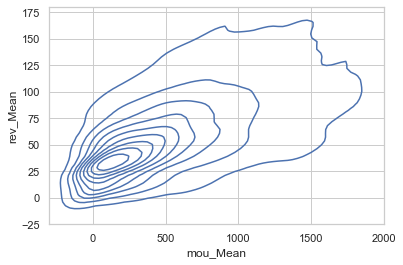

In [827]:
sns.kdeplot(data=df_filtered, x='mou_Mean', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-300, 2000])
ax.set_ylim([-25, 180])
plt.show()

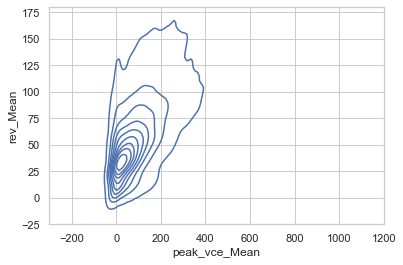

In [828]:
sns.kdeplot(data=df_filtered, x='peak_vce_Mean', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-300, 1200])
ax.set_ylim([-25, 180])
plt.show()

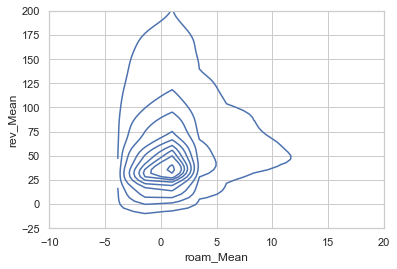

In [826]:
sns.kdeplot(data=df_filtered, x='roam_Mean', y='rev_Mean')
ax = plt.gca()
ax.set_xlim([-10, 20])
ax.set_ylim([-25, 200])
plt.show()

phones
1.0 Mean = 47.57410096261451 Var = 1043.5492930126309
2.0 Mean = 58.93867464538032 Var = 1807.6145520633288
3.0 Mean = 67.32494620649253 Var = 2256.0133539772946
4.0 Mean = 73.33715733333601 Var = 2656.430745689026
5.0 Mean = 82.46258928577068 Var = 4145.029931541064
6.0 Mean = 80.71074149673468 Var = 2950.8932325317687
7.0 Mean = 98.09529929577465 Var = 6208.9863407342555
8.0 Mean = 111.33962454175824 Var = 7907.994691461876
9.0 Mean = 100.10492857142856 Var = 4267.220478119748
10.0 Mean = 116.21206989354837 Var = 4518.532595828355
11.0 Mean = 100.57958333333333 Var = 2922.768633901515
12.0 Mean = 128.74013888833335 Var = 3569.2160793851895
13.0 Mean = 100.2909375 Var = 1401.1831177455358
14.0 Mean = 85.43321428571429 Var = 831.492245238095
15.0 Mean = 192.27875 Var = 56653.987578124994
16.0 Mean = 290.12 Var = 73635.8688
17.0 Mean = 81.19875 Var = 11612.499003125002
19.0 Mean = 60.426249999999996 Var = 2821.319403125


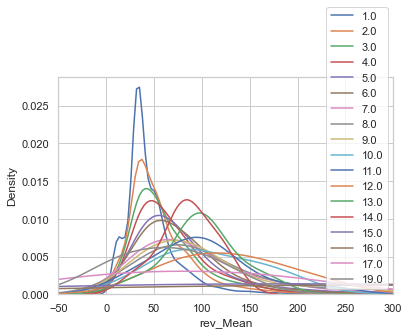

In [799]:
for target_feature in target_features:
    for cat_column in ['phones']:
        print(cat_column)
        for cat_column_value in np.unique(df[cat_column]):
            data = df_filtered[df_filtered[cat_column] == cat_column_value][target_feature]
            print(cat_column_value, "Mean =", data.mean(), "Var =", data.var())
            sns.kdeplot(data, label=cat_column_value)
        ax = plt.gca()
        ax.set_xlim([-50, 300])
        plt.title = cat_columns
        plt.legend()
        plt.show()

## Step 4. Estimation of pair correlation coefficients, confidence intervals for them and significance levels.

<AxesSubplot:>

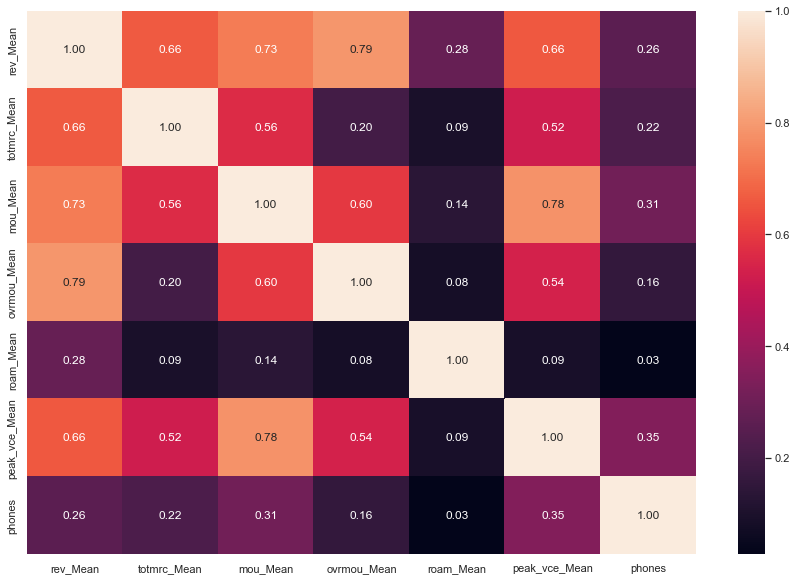

In [800]:
plt.figure(figsize = (15,10))
sns.heatmap(df_filtered.corr(), annot=True, fmt='.2f')

In [801]:
from scipy.stats import pearsonr, norm

def pearsonr_ci(x, y, alpha=0.05):
    r, _ = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    z = norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, lo, hi

n = len(predict_features)
for i in range(n):
    for j in range(i + 1, n):
        cc, low, high = pearsonr_ci(df_filtered[predict_features[i]], df_filtered[predict_features[j]])
        print("CC [%f, %f] (%s, %s)" % (low, high, predict_features[i], predict_features[j]))

CC [0.555241, 0.571612] (totmrc_Mean, mou_Mean)
CC [0.190307, 0.213318] (totmrc_Mean, ovrmou_Mean)
CC [0.080808, 0.104589] (totmrc_Mean, roam_Mean)
CC [0.515738, 0.533128] (totmrc_Mean, peak_vce_Mean)
CC [0.213016, 0.235795] (totmrc_Mean, phones)
CC [0.589114, 0.604556] (mou_Mean, ovrmou_Mean)
CC [0.123270, 0.146820] (mou_Mean, roam_Mean)
CC [0.777482, 0.786794] (mou_Mean, peak_vce_Mean)
CC [0.301617, 0.323263] (mou_Mean, phones)
CC [0.069368, 0.093197] (ovrmou_Mean, roam_Mean)
CC [0.530937, 0.547944] (ovrmou_Mean, peak_vce_Mean)
CC [0.147348, 0.170729] (ovrmou_Mean, phones)
CC [0.077219, 0.101016] (roam_Mean, peak_vce_Mean)
CC [0.015778, 0.039747] (roam_Mean, phones)
CC [0.336199, 0.357302] (peak_vce_Mean, phones)


## Step 5. Task formulation for regression. Estimate multivariate correlation (target-predictors).

[Coefficient of multiple correlation](https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation)

In [802]:
df_ = full_df[predict_features + [target_feature]].dropna()
alpha = 0.4
for feature in predict_features + [target_feature]:
    df_ = df_[(df_[target_feature] > np.percentile(df[target_feature], alpha)) & (df_[target_feature] < np.percentile(df[target_feature], 100 - alpha))]
X, y = df_[predict_features], df_[target_feature]
X.shape

(98413, 6)

In [803]:
cxx = X.corr().to_numpy()
cxy = np.array([pearsonr(X[feature], y)[0] for feature in predict_features])
np.dot(np.dot(cxy.T, np.linalg.inv(cxx)), cxy)

0.9084149462593569

In [804]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
X = MinMaxScaler().fit_transform(X)
# X = PolynomialFeatures(2).fit_transform(X)

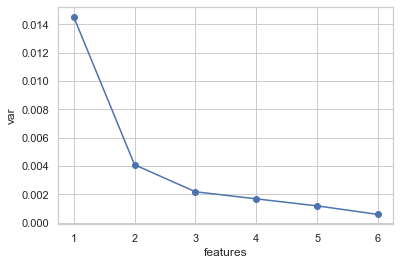

In [805]:
from sklearn.decomposition import PCA


pca = PCA().fit(X)
var = np.std(pca.transform(X), axis=0) ** 2
fig, ax = plt.subplots()
ax.plot(np.arange(len(var)) + 1, var, "o-")
ax.set_xlabel('features')
ax.set_ylabel('var')
plt.show()


## Step 6. Regression model and analysis of multicollinearity and regularization 

In [806]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [807]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [808]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.915195124528989
RMSE 10.799351500674032


In [809]:
# from sklearn.linear_model import Lasso

# reg_ = Lasso(alpha=0.01).fit(X_train, y_train)
# y_pred_ = reg_.predict(X_test)
# print("R2  ", r2_score(y_test, y_pred_))
# print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_)))
# y_diff = y_test - y_pred_
# p = norm.fit(y_diff)
# print(cramervonmises(y_diff, norm(*p).cdf))

          rev_Mean
count 32477.000000
mean     -0.112066
std      10.798936
min    -186.096853
25%      -5.778013
50%      -0.789992
75%       3.051331
max     184.788776
(-0.11206601326352897, 10.798770024580655)


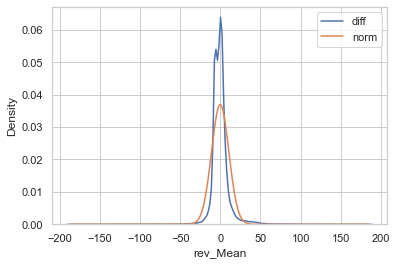

In [810]:
ax = plt.gca()
y_diff = y_test - y_pred
print(pd.DataFrame(y_diff).describe())
sns.kdeplot(y_diff, label='diff')
p = norm.fit(y_diff)
print(p)
tiks = np.arange(y_diff.min(), y_diff.max(), (y_diff.max() - y_diff.min()) / 1000)
plt.plot(tiks, norm(*p).pdf(tiks), label='norm')
plt.legend()
plt.show()

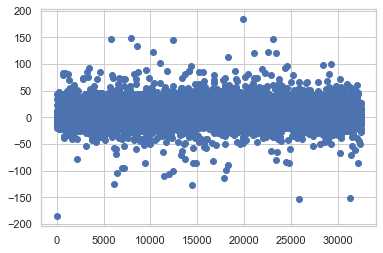

In [811]:
plt.scatter(np.arange(len(y_test)), y_diff)

In [812]:
from scipy.stats import cramervonmises
p = norm.fit(y_diff)
print(cramervonmises(y_diff, norm(*p).cdf))

CramerVonMisesResult(statistic=243.80744441681193, pvalue=7.35640999227627e-08)
